In [2]:
pip install opencv-python


     |████████████████████████████████| 62.5 MB 31 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python-headless


     |████████████████████████████████| 49.9 MB 1.1 kB/s eta 0:00:011    |███████████████████████▋        | 36.8 MB 6.3 MB/s eta 0:00:03
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
print(cv2.__version__)


4.5.5


In [2]:
pip install tensorflow


  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
ERROR: torch 2.4.1 has requirement typing-extensions>=4.8.0, but you'll have typing-extensions 4.5.0 which is incompatible.
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.12.2
    Uninstalling typing-extensions-4.12.2:
      Successfully uninstalled typing-extensions-4.12.2
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
print(tf.__version__)


2024-12-04 11:43:28.114513: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 11:43:30.492864: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 11:43:30.513527: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-04 11:43:40.104025: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


2.13.1


In [1]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


2024-12-27 12:21:05.244880: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-27 12:21:15.539998: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-27 12:21:15.631842: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-27 12:21:41.397856: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
import os  # Ensure this is included at the top

# Paths to train and test folders
base_dir = "/home/rgukt/Music/major/major/Driver_Fatigue/Drowsy_datset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

print("Train Directory:", train_dir)
print("Test Directory:", test_dir)



Train Directory: /home/rgukt/Music/major/major/Driver_Fatigue/Drowsy_datset/train
Test Directory: /home/rgukt/Music/major/major/Driver_Fatigue/Drowsy_datset/test


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Import this!

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=15,  # Data augmentation
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# Only normalization for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Paths to train and test directories
import os
base_dir = "/home/rgukt/Music/major/major/Driver_Fatigue/Drowsy_datset"
train_dir = os.path.join(base_dir, "train")
test_dir = os.path.join(base_dir, "test")

# Load images in batches from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize all images to 128x128
    batch_size=32,
    class_mode='binary'  # Binary classification: drowsy or natural
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary'
)


Found 5859 images belonging to 2 classes.
Found 1483 images belonging to 2 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Build the model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    # Fully connected layers
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 64)        0

2024-12-27 12:23:14.429554: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12845056 exceeds 10% of free system memory.
2024-12-27 12:23:14.444072: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12845056 exceeds 10% of free system memory.
2024-12-27 12:23:14.467815: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12845056 exceeds 10% of free system memory.


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=4,  # Set epochs as per your need
    validation_data=test_generator,
    validation_steps=test_generator.samples // test_generator.batch_size
)


Epoch 1/4


2024-12-04 11:44:04.915912: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12845056 exceeds 10% of free system memory.
2024-12-04 11:44:04.921378: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 12845056 exceeds 10% of free system memory.


183/183 [==============================] - 191s 1s/step - loss: 0.6458 - accuracy: 0.6231 - val_loss: 0.4979 - val_accuracy: 0.8084
Epoch 2/4
183/183 [==============================] - 172s 939ms/step - loss: 0.4079 - accuracy: 0.8177 - val_loss: 0.3103 - val_accuracy: 0.8784
Epoch 3/4
183/183 [==============================] - 175s 953ms/step - loss: 0.3577 - accuracy: 0.8425 - val_loss: 0.2564 - val_accuracy: 0.9171
Epoch 4/4
183/183 [==============================] - 175s 956ms/step - loss: 0.3104 - accuracy: 0.8756 - val_loss: 0.2237 - val_accuracy: 0.9321


In [10]:
test_loss, test_accuracy = model.evaluate(test_generator)
train_loss, train_accuracy = model.evaluate(train_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"train accuracy: {train_accuracy * 100:.2f}%")


184/184 [==============================] - 51s 274ms/step - loss: 0.2341 - accuracy: 0.9095
Test Accuracy: 93.26%
train accuracy: 90.95%


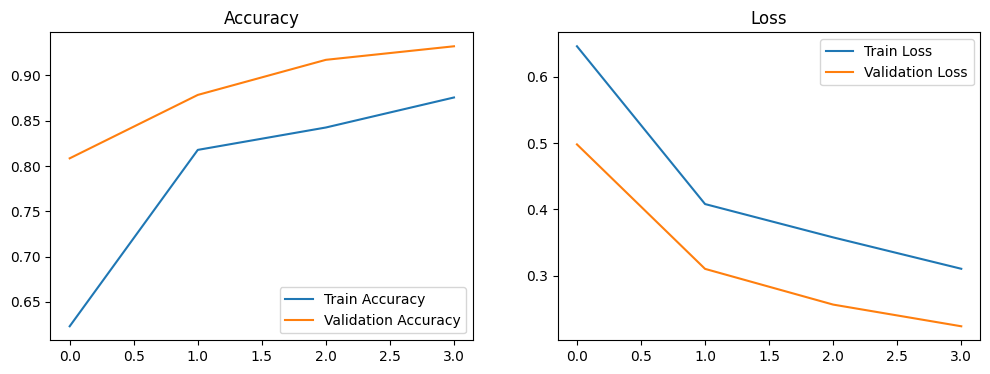

In [11]:
import matplotlib.pyplot as plt  # Add this import at the top

# Plot accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


47/47 [==============================] - 12s 241ms/step
              precision    recall  f1-score   support

     Natural       0.49      0.42      0.45       757
      Drowsy       0.47      0.53      0.50       726

    accuracy                           0.48      1483
   macro avg       0.48      0.48      0.48      1483
weighted avg       0.48      0.48      0.48      1483



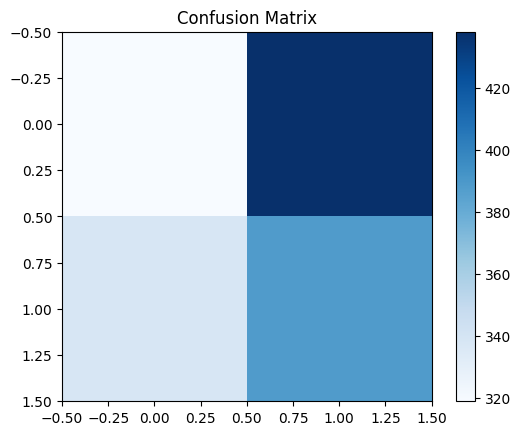

In [12]:
from sklearn.metrics import classification_report, confusion_matrix  # Add this import at the top

# Predict on test data
predictions = (model.predict(test_generator) > 0.5).astype("int32")

# Classification report
print(classification_report(test_generator.classes, predictions, target_names=['Natural', 'Drowsy']))

# Confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.show()


In [13]:
def predict_image(image_path):
    # Load and preprocess image
    img = cv2.imread(image_path)
    img = cv2.resize(img, (128, 128)) / 255.0  # Resize and normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Predict
    prediction = model.predict(img)
    if prediction > 0.5:
        print(f"Image: {image_path} - Drowsy")
    else:
        print(f"Image: {image_path} - Natural")


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_image(image_path, threshold=0.29):
    # Load and preprocess image
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to load image at {image_path}")
        return

    # Resize image and normalize pixel values to range [0, 1]
    img_resized = cv2.resize(img, (128, 128)) / 255.0  
    img_expanded = np.expand_dims(img_resized, axis=0)  # Add batch dimension

    # Convert BGR to RGB for correct visualization
    img_rgb = cv2.cvtColor((img_resized * 255).astype(np.uint8), cv2.COLOR_BGR2RGB)  # Scale back to [0, 255] and convert to uint8

    # Visualize the image with the current prediction (before threshold)
    prediction = model.predict(img_expanded)
    plt.imshow(img_rgb)
    plt.title(f"Prediction (raw probability): {prediction[0][0]:.2f}")
    plt.show()

    # Apply threshold for classification
    result = "Natural" if prediction[0][0] > threshold else "Drowsy"
    print(f"Prediction (raw probability): {prediction[0][0]:.2f}")
    print(f"Final Prediction: {result}")

    return result


1/1 [==============================] - 0s 149ms/step


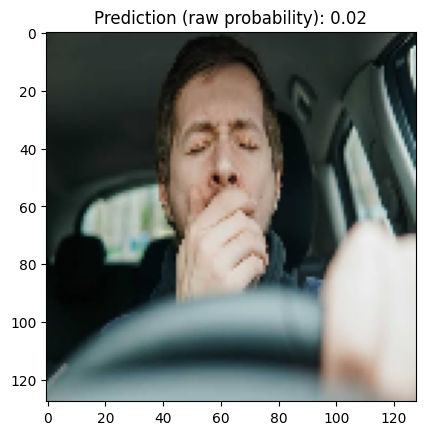

Prediction (raw probability): 0.02
Final Prediction: Drowsy
Prediction: Drowsy


In [15]:
image_path = "/home/rgukt/Music/major/major/Driver_Fatigue/image12.jpeg"  # Adjust path to your image
result = predict_image(image_path)
print("Prediction:", result)

1/1 [==============================] - 0s 37ms/step


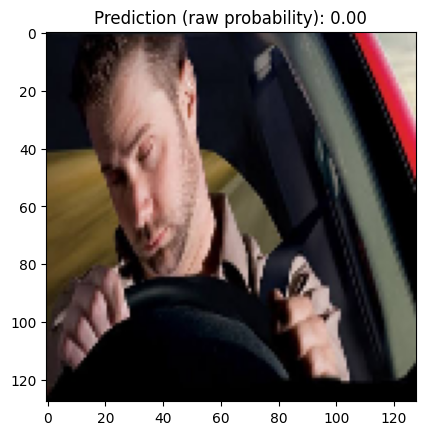

Prediction (raw probability): 0.00
Final Prediction: Drowsy
Prediction: Drowsy
1/1 [==============================] - 0s 38ms/step


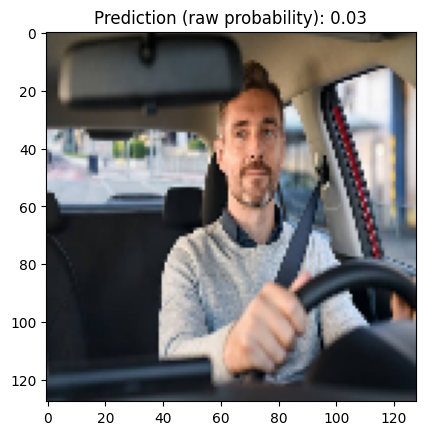

Prediction (raw probability): 0.03
Final Prediction: Drowsy
Prediction: Drowsy


In [16]:
result = predict_image("/home/rgukt/Music/major/major/Driver_Fatigue/image13.jpeg")
print(f"Prediction: {result}")
result = predict_image("/home/rgukt/Music/major/major/Driver_Fatigue/image14.jpg")
print(f"Prediction: {result}")


In [17]:
# Save the model without the optimizer state
model.save("drowsiness_detection_model.keras")


In [18]:
from tensorflow.keras.models import load_model
model = load_model("drowsiness_detection_model.keras")


In [15]:
import cv2
import numpy as np
from playsound import playsound
import threading

# Start webcam
cap = cv2.VideoCapture(0)

# Check if webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Function to play alarm sound
def play_alarm():
    playsound("/home/rgukt/Music/major/major/Driver_Fatigue/alarm.mp3-[AudioTrimmer.com].mp3")  # Replace with the path to your alarm sound file

# Alarm state to avoid continuous playback
alarm_triggered = False

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to grab frame.")
        break

    # Preprocess the frame (resize and normalize)
    resized_frame = cv2.resize(frame, (128, 128)) / 255.0
    resized_frame = np.expand_dims(resized_frame, axis=0)

    # Predict drowsiness (this assumes 'model' is already loaded and compiled)
    prediction = model.predict(resized_frame)
    label = "Natural" if prediction < 0.29 else "Drowsy"

    # If drowsy is detected and the alarm is not already playing, trigger it
    if label == "Drowsy" and not alarm_triggered:
        alarm_triggered = True
        threading.Thread(target=play_alarm, daemon=True).start()

    # If the user is natural, reset alarm state
    if label == "Natural":
        alarm_triggered = False

    # Display the result on the video frame
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Show the frame with label
    cv2.imshow("Driver Drowsiness Detection", frame)

    # Exit loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 40ms/step


In [48]:
!pip install pygame

     |████████████████████████████████| 14.0 MB 258 kB/s eta 0:00:01


In [16]:
import cv2
import numpy as np
import threading
import pygame


pygame.mixer.init()

alarm_sound = "/home/rgukt/Music/major/major/Driver_Fatigue/alarm.mp3-[AudioTrimmer.com].mp3"
pygame.mixer.music.load(alarm_sound)



# Start webcam
cap = cv2.VideoCapture(0)

# Check if webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

# Function to play alarm sound
def play_alarm():
    pygame.mixer.music.play(loops=-1)
    
    
# Alarm state to avoid continuous playback
alarm_triggered = False

while cap.isOpened():
    global alarm_triggered
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to grab frame.")
        break

    # Preprocess the frame (resize and normalize)
    resized_frame = cv2.resize(frame, (128, 128)) / 255.0
    resized_frame = np.expand_dims(resized_frame, axis=0)

    # Predict drowsiness (this assumes 'model' is already loaded and compiled)
    prediction = model.predict(resized_frame)
    label = "Natural" if prediction < 0.33 else "Drowsy"

    # If drowsy is detected and the alarm is not already playing, trigger it
    if label == "Drowsy" and not alarm_triggered:
        alarm_triggered = True
        threading.Thread(target=play_alarm, daemon=True).start()

    # If the user is natural, reset alarm state
    if label == "Natural" and alarm_triggered:
        alarm_triggered = False
        pygame.mixer.music.stop()

    # Display the result on the video frame
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Show the frame with label
    cv2.imshow("Driver Drowsiness Detection", frame)

    # Exit loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


pygame 2.6.1 (SDL 2.28.4, Python 3.8.10)
Hello from the pygame community. https://www.pygame.org/contribute.html
1/1 [==============================] - 0s 41ms/step


I0000 00:00:1732727823.620599    3317 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1732727823.623078    6037 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 21.2.6), renderer: AMD Radeon(TM) Vega 3 Graphics (RAVEN2, DRM 3.42.0, 5.15.0-100-generic, LLVM 12.0.0)


In [24]:
import cv2
import numpy as np

# Start webcam
cap = cv2.VideoCapture(0)

# Check if webcam is opened successfully
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Failed to grab frame.")
        break

    # Preprocess the frame (resize and normalize)
    resized_frame = cv2.resize(frame, (128, 128)) / 255.0
    resized_frame = np.expand_dims(resized_frame, axis=0)

    # Predict drowsiness (this assumes 'model' is already loaded and compiled)
    prediction = model.predict(resized_frame)
    label = "Drowsy" if prediction > 0.5 else "Natural"

    # Display the result on the video frame
    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    # Show the frame with label
    cv2.imshow("Driver Drowsiness Detection", frame)

    # Exit loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close windows
cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
